***
# Cleaning cars data
***

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()
print(cwd)

c:\Users\segch001\Documents\GitHub\ml_car


In [3]:
# get the program file path
cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}

for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)
    
    # print(folders)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant


In [4]:
# Création des variables de path
path_prog =     cwd + '\\'
path_data =     folders['Data'] + '\\'
path_df =       folders['Dataframe'] + '\\'
path_output =   folders['Output'] + '\\'

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')

# Détermination de l'année
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

c:\Users\segch001\Documents\GitHub\ml_car\
c:\Users\segch001\Documents\GitHub\ml_car\Data\
c:\Users\segch001\Documents\GitHub\ml_car\Dataframe\
c:\Users\segch001\Documents\GitHub\ml_car\Output\


In [5]:
# Import et nettoyage
cars = pd.read_excel(path_data + 'BDSOQ.xlsx', header=5)
# Source des données : 
# https://bdso.gouv.qc.ca/pls/ken/ken213_afich_tabl.page_tabl?p_iden_tran=&p_lang=&p_m_o=SAAQ&p_id_ss_domn=718&p_id_raprt=3372#tri_age=1&tri_tertr=0

cars_ld = cars.loc[3:4].T.reset_index().loc[1:]
pd.set_option('display.max_columns', None)
column_names = ['year', 'vt', 'cl']
cars_ld.columns.values[0:len(column_names)] = column_names
cars_ld['total'] = cars_ld['vt'] + cars_ld['cl']

# Convert 'year' column to integers
cars_ld['year'] = cars_ld['year'].astype(int)
cars_ld

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758
3,2002,2729651,870812,3600463
4,2003,2799402,917540,3716942
5,2004,2847525,955337,3802862
6,2005,2871969,990193,3862162
7,2006,2899086,1035485,3934571
8,2007,2932451,1088787,4021238
9,2008,2972370,1132018,4104388
10,2009,3000245,1201962,4202207


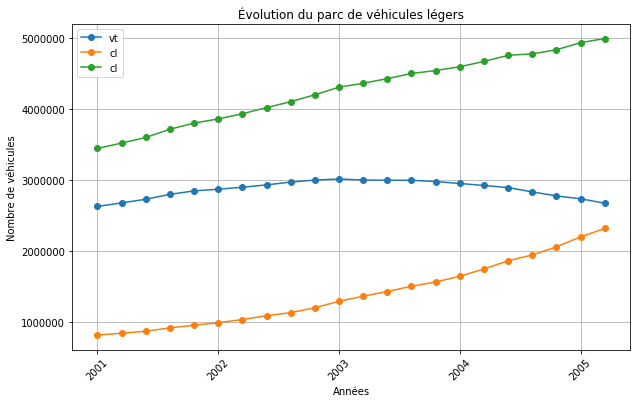

In [7]:
# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.plot(cars_ld['year'], cars_ld['vt'], marker='o', label='vt')
ax.plot(cars_ld['year'], cars_ld['cl'], marker='o', label='cl')
ax.plot(cars_ld['year'], cars_ld['total'], marker='o', label='cl')

# Add labels and title
ax.set_xlabel('Années')
ax.set_ylabel('Nombre de véhicules')
ax.set_title('Évolution du parc de véhicules légers')
ax.legend()

ax.set_xticklabels(cars_ld['year'], rotation=45, ha='center')
# Display the plot
ax.grid(True)
plt.show()

***
## Forecast of the total number of light duty vehicules
***

In [97]:
# Splitting the data into X (year) and y (total)
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['total'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2036).reshape(-1, 1)

# Calculate the predictions
predictions = model.predict(years_to_predict)

# Compute confidence intervals for predictions
confidence = 0.95
std_error = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (len(y) - 2))
t_multiplier = stats.t.ppf((1 + confidence) / 2, len(X) - 2)
margin_of_error = t_multiplier * std_error
confidence_intervals = np.column_stack((predictions - margin_of_error, predictions + margin_of_error))

# Create a DataFrame with original values, predictions, and confidence intervals
data = {'year': np.concatenate((cars_ld['year'], years_to_predict.flatten())),
        'total': np.concatenate((y, [None] * len(years_to_predict))),
        'prediction': np.concatenate(([None] * len(cars_ld['year']), predictions)),
        'lower_CI': np.concatenate(([None] * len(cars_ld['year']), confidence_intervals[:, 0])),
        'upper_CI': np.concatenate(([None] * len(cars_ld['year']), confidence_intervals[:, 1]))}

predictions_df = pd.DataFrame(data)
# Replace None values with np.nan
predictions_df = predictions_df.replace([None], np.nan)

predictions_df

,lower_CI,prediction,total,upper_CI,year
0,NaN,NaN,3446103.0,NaN,2000.0
1,NaN,NaN,3521758.0,NaN,2001.0
2,NaN,NaN,3600463.0,NaN,2002.0
3,NaN,NaN,3716942.0,NaN,2003.0
4,NaN,NaN,3802862.0,NaN,2004.0
5,NaN,NaN,3862162.0,NaN,2005.0
6,NaN,NaN,3934571.0,NaN,2006.0
7,NaN,NaN,4021238.0,NaN,2007.0
8,NaN,NaN,4104388.0,NaN,2008.0
9,NaN,NaN,4202207.0,NaN,2009.0


In [98]:
# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y, model.predict(X))
mse = mean_squared_error(y, model.predict(X))
rmse = np.sqrt(mse)
r2 = r2_score(y, model.predict(X))

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 30845.01
Mean Squared Error: 1461998973.34
Root Mean Squared Error: 38236.10
R-squared: 0.99


### Interpretation
- low MAE and RMSE indicate that the predictions are close to the actual value
- R2 of 0.99 is very near 1, it suggest that the model explain a substential amount of the variability
***

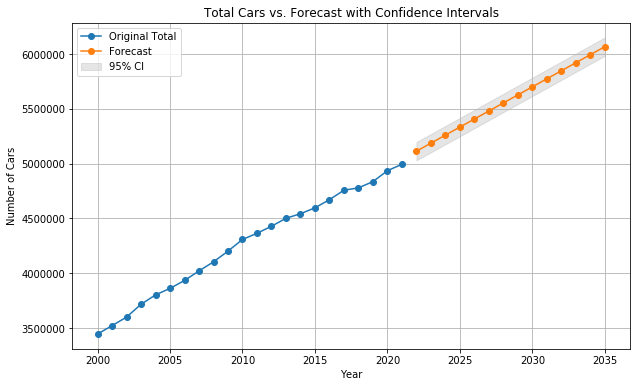

In [99]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(predictions_df['year'], predictions_df['total'], label='Original Total', marker='o')
plt.plot(predictions_df['year'], predictions_df['prediction'], label='Forecast', marker='o')

# Add Confidence Intervals
plt.fill_between(predictions_df['year'], predictions_df['lower_CI'], predictions_df['upper_CI'], color='gray', alpha=0.2, label='95% CI')

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Total Cars vs. Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

***
## Forecast of cars
***

In [24]:
cars_ld.head(2)

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758


In [ ]:
# Splitting the data into X (year) and y (total)
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['vt'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2031).reshape(-1, 1)

# Calculate the predictions
predictions = model.predict(years_to_predict)

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Your existing code to create the predictions
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['vt'].values


# Polynomial features and Ridge regression
poly_features = PolynomialFeatures(degree=7)  # You can adjust the degree
X_poly = poly_features.fit_transform(X)
ridge_model = Ridge(alpha=5.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_poly, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2036).reshape(-1, 1)
X_to_predict = poly_features.transform(years_to_predict)
predictions = ridge_model.predict(X_to_predict)

# Create a DataFrame with original values, predictions, and confidence intervals (if applicable)
data = {'year': np.concatenate((cars_ld['year'], years_to_predict.flatten())),
        'vt': np.concatenate((y, [None] * len(years_to_predict))),
        'total': np.concatenate((cars_ld['total'], [None] * len(years_to_predict))),
        'prediction': np.concatenate(([None] * len(cars_ld['year']), predictions))
}

predictions_df = pd.DataFrame(data)

# Print the DataFrame with original values, predictions, and confidence intervals
predictions_df

,prediction,total,vt,year
0,None,3446103,2.62911e+06,2000.0
1,None,3521758,2.6786e+06,2001.0
2,None,3600463,2.72965e+06,2002.0
3,None,3716942,2.7994e+06,2003.0
4,None,3802862,2.84752e+06,2004.0
5,None,3862162,2.87197e+06,2005.0
6,None,3934571,2.89909e+06,2006.0
7,None,4021238,2.93245e+06,2007.0
8,None,4104388,2.97237e+06,2008.0
9,None,4202207,3.00024e+06,2009.0


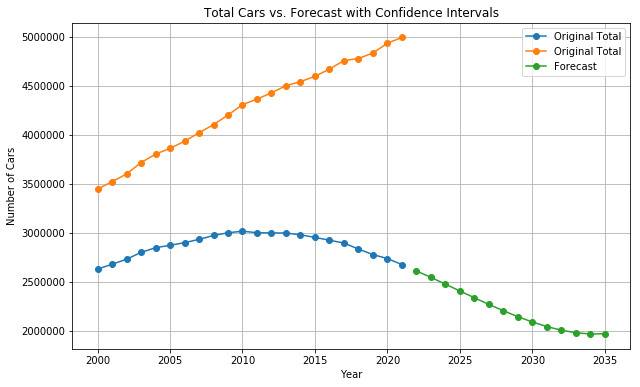

In [101]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(predictions_df['year'], predictions_df['vt'], label='Original Total', marker='o')
plt.plot(predictions_df['year'], predictions_df['total'], label='Original Total', marker='o')

plt.plot(predictions_df['year'], predictions_df['prediction'], label='Forecast', marker='o')

# Add Confidence Intervals
# plt.fill_between(predictions_df['Year'], predictions_df['Lower CI'], predictions_df['Upper CI'], color='gray', alpha=0.2, label='95% CI')

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Total Cars vs. Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

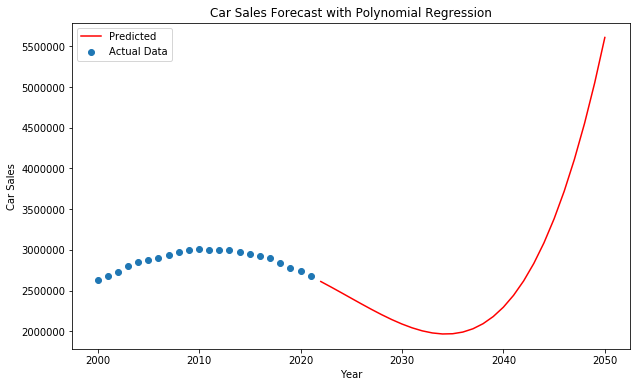

     prediction            vt    year
0          None  2.629106e+06  2000.0
1          None  2.678598e+06  2001.0
2          None  2.729651e+06  2002.0
3          None  2.799402e+06  2003.0
4          None  2.847525e+06  2004.0
5          None  2.871969e+06  2005.0
6          None  2.899086e+06  2006.0
7          None  2.932451e+06  2007.0
8          None  2.972370e+06  2008.0
9          None  3.000245e+06  2009.0
10         None  3.015902e+06  2010.0
11         None  3.000869e+06  2011.0
12         None  2.998490e+06  2012.0
13         None  2.997492e+06  2013.0
14         None  2.979144e+06  2014.0
15         None  2.952378e+06  2015.0
16         None  2.924369e+06  2016.0
17         None  2.894562e+06  2017.0
18         None  2.834054e+06  2018.0
19         None  2.776988e+06  2019.0
20         None  2.736416e+06  2020.0
21         None  2.675434e+06  2021.0
22  2.61095e+06  2.610946e+06  2022.0
23  2.54408e+06  2.544079e+06  2023.0
24  2.47527e+06  2.475272e+06  2024.0
25   2.4056e

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Your existing code to create the predictions
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['vt'].values

# Polynomial features and Ridge regression
poly_features = PolynomialFeatures(degree=7)  # You can adjust the degree
X_poly = poly_features.fit_transform(X)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_poly, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2051).reshape(-1, 1)
X_to_predict = poly_features.transform(years_to_predict)
predictions = ridge_model.predict(X_to_predict)

# Ensure predictions are non-negative
predictions = np.maximum(predictions, 0)

# Create a DataFrame with original values and predictions
data = {'year': np.concatenate((cars_ld['year'], years_to_predict.flatten())),
        'vt': np.concatenate((y, predictions)),  # Update 'vt' with non-negative predictions
        'prediction': np.concatenate(([None] * len(cars_ld['year']), predictions))
}

predictions_df = pd.DataFrame(data)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(cars_ld['year'], cars_ld['vt'], label='Actual Data')
plt.plot(predictions_df['year'], predictions_df['prediction'], color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Car Sales')
plt.title('Car Sales Forecast with Polynomial Regression')
plt.legend()
plt.show()

# Print the DataFrame with original values and predictions
print(predictions_df)

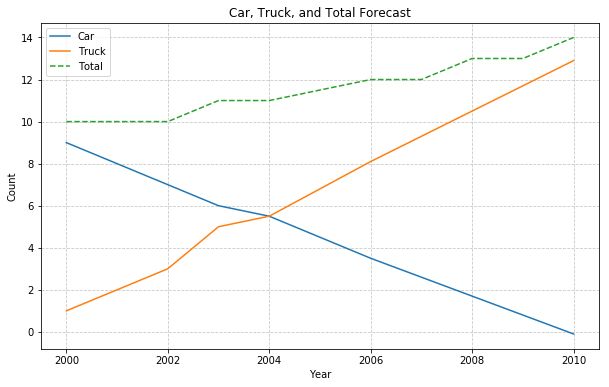

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
total = np.array([10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14])
car_known = np.array([9, 8, 7, 6, 5.5])
truck_known = np.array([1, 2, 3, 5, 5.5])

# Calculate missing car and truck data using the relationship: Total = Car + Truck
car_missing = total[6:] - car_known
truck_missing = total[6:] - truck_known

# Reshape the data for sklearn input
years_known = years[:5].reshape(-1, 1)  # Use the first 5 years for training
car_known = car_known.reshape(-1, 1)
truck_known = truck_known.reshape(-1, 1)

# Create a Linear Regression model for car and truck separately
car_model = LinearRegression()
car_model.fit(years_known, car_known)

truck_model = LinearRegression()
truck_model.fit(years_known, truck_known)

# Forecast car and truck data for years 2006 to 2010
forecast_years = years[6:].reshape(-1, 1)
forecasted_car = car_model.predict(forecast_years)
forecasted_truck = truck_model.predict(forecast_years)

# Create a DataFrame
data = {
    'Year': np.concatenate((years_known, forecast_years)).flatten(),
    'Total': np.concatenate((total[:5], total[6:])).flatten(),
    'Car': np.concatenate((car_known, forecasted_car)).flatten(),
    'Truck': np.concatenate((truck_known, forecasted_truck)).flatten()
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df['Year'], df['Car'], label='Car')
plt.plot(df['Year'], df['Truck'], label='Truck')
plt.plot(df['Year'], df['Total'], label='Total', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Car, Truck, and Total Forecast')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.show()

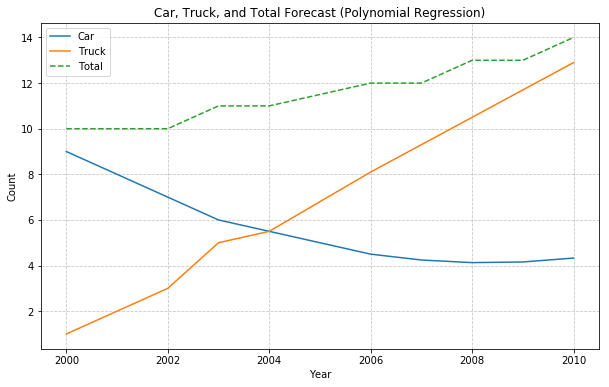

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
total = np.array([10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14])
car_known = np.array([9, 8, 7, 6, 5.5])
truck_known = np.array([1, 2, 3, 5, 5.5])

# Calculate missing car and truck data using the relationship: Total = Car + Truck
car_missing = total[6:] - car_known
truck_missing = total[6:] - truck_known

# Reshape the data for sklearn input
years_known = years[:5].reshape(-1, 1)  # Use the first 5 years for training
car_known = car_known.reshape(-1, 1)
truck_known = truck_known.reshape(-1, 1)

# Create Polynomial Features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
years_poly = poly.fit_transform(years_known)

# Fit Polynomial Regression models for car and truck separately
car_model = LinearRegression()
car_model.fit(years_poly, car_known)

truck_model = LinearRegression()
truck_model.fit(years_poly, truck_known)

# Forecast car and truck data for years 2006 to 2010
forecast_years = years[6:].reshape(-1, 1)
forecast_years_poly = poly.transform(forecast_years)
forecasted_car = car_model.predict(forecast_years_poly)
forecasted_truck = truck_model.predict(forecast_years_poly)

# Create a DataFrame
data = {
    'Year': np.concatenate((years_known, forecast_years)).flatten(),
    'Total': np.concatenate((total[:5], total[6:])).flatten(),
    'Car': np.concatenate((car_known, forecasted_car)).flatten(),
    'Truck': np.concatenate((truck_known, forecasted_truck)).flatten()
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df['Year'], df['Car'], label='Car')
plt.plot(df['Year'], df['Truck'], label='Truck')
plt.plot(df['Year'], df['Total'], label='Total', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Car, Truck, and Total Forecast (Polynomial Regression)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.show()

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
total = np.array([10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14])
car_known = np.array([9, 8, 7, 6, 5.5])
truck_known = np.array([1, 2, 3, 5, 5.5])

# Calculate missing car and truck data using the relationship: Total = Car + Truck
car_missing = total[6:] - car_known
truck_missing = total[6:] - truck_known

# Reshape the data for sklearn input
years_known = years[:5].reshape(-1, 1)  # Use the first 5 years for training
car_known = car_known.reshape(-1, 1)
truck_known = truck_known.reshape(-1, 1)

# Create Polynomial Features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
years_poly = poly.fit_transform(years_known)

# Fit Polynomial Regression models for car and truck separately
car_model = LinearRegression()
car_model.fit(years_poly, car_known)

truck_model = LinearRegression()
truck_model.fit(years_poly, truck_known)

# Forecast total data for years 2006 to 2010
forecast_years = years[6:].reshape(-1, 1)
forecast_years_poly = poly.transform(forecast_years)
forecasted_total = total[6:]

# Calculate forecasts for car and truck while respecting the relationship Total = Car + Truck
forecasted_car = (forecasted_total - truck_known[-1]) - car_model.predict(forecast_years_poly)
forecasted_truck = forecasted_total - forecasted_car

# Ensure that forecasted values don't go below 0
forecasted_car = np.maximum(forecasted_car, 0)
forecasted_truck = np.maximum(forecasted_truck, 0)

# Create a DataFrame
data = {
    'Year': np.concatenate((years_known.flatten(), forecast_years.flatten())),
    'Total': np.concatenate((total[:5], forecasted_total)),
    'Car': np.concatenate((car_known.flatten(), forecasted_car)),
    'Truck': np.concatenate((truck_known.flatten(), forecasted_truck))
}

# Only keep data up to the year 2010 (optional)
data = {key: value[:11] for key, value in data.items()}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Car'], label='Car')
plt.plot(df['Year'], df['Truck'], label='Truck')
plt.plot(df['Year'], df['Total'], label='Total', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Car, Truck, and Total Forecast (Polynomial Regression)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.show()

ValueError: all the input arrays must have same number of dimensions

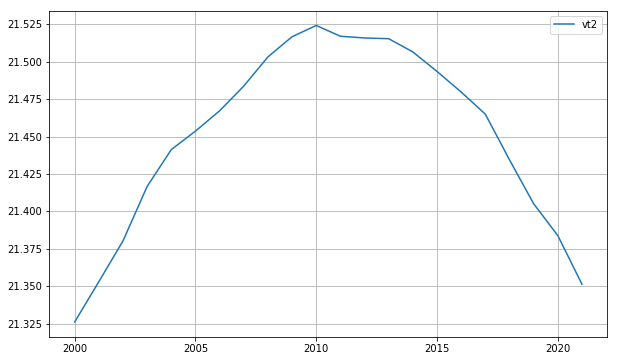

In [20]:
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named cars_ld and a column 'vt' in it
# Convert the 'vt' column to numeric if it's not already numeric
cars_ld['vt'] = pd.to_numeric(cars_ld['vt'], errors='coerce')

# Apply the np.log2 function to the 'vt' column and store the result in a new column 'vt2'
cars_ld['vt2'] = np.log2(cars_ld['vt'])


plt.figure(figsize=(10, 6), facecolor='white')
# plt.plot(cars_ld['year'], cars_ld['vt'], label='vt')
plt.plot(cars_ld['year'], cars_ld['vt2'], label='vt2')
# plt.plot(cars_ld['year'], cars_ld['total'], label='total')
plt.legend()
plt.grid(True)
plt.show()

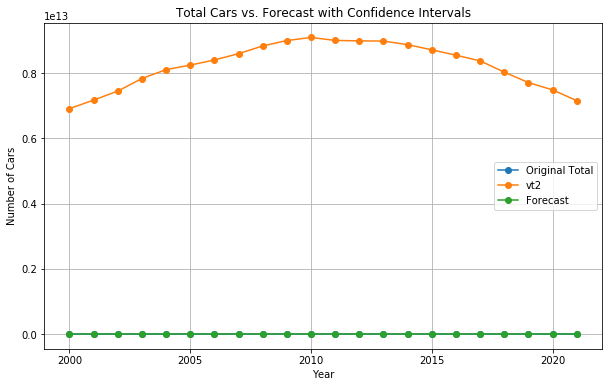

In [12]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(cars_ld['year'], cars_ld['vt'], label='Original Total', marker='o')
plt.plot(cars_ld['year'], cars_ld['vt2'], label='vt2', marker='o')
plt.plot(cars_ld['year'], cars_ld['total'], label='Forecast', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Total Cars vs. Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
cars_ld

,year,vt,cl,total,vt2
1,2000,2629106,816997,3446103,6912198359236
2,2001,2678598,843160,3521758,7174887245604
3,2002,2729651,870812,3600463,7450994581801
4,2003,2799402,917540,3716942,7836651557604
5,2004,2847525,955337,3802862,8108398625625
6,2005,2871969,990193,3862162,8248205936961
7,2006,2899086,1035485,3934571,8404699635396
8,2007,2932451,1088787,4021238,8599268867401
9,2008,2972370,1132018,4104388,8834983416900
10,2009,3000245,1201962,4202207,9001470060025
